# COGS 18 - Final Exam

This is the practice final exam for Winter 2022. It covers topics through the end of the course.

This exam is out of 0 points, but the real thing will be out of 19 points, worth 19% of your grade. 

**PLEASE DO NOT CHANGE THE NAME OF THIS FILE.**

**PLEASE DO NOT COPY & PASTE OR DELETE CELLS INLCUDED IN THE EXAM.** (Note that you can add additional cells, if you want to test things out.

## Instructions
|
#### Timing
- The exam is designed to take you ~2-3h.
- If it takes you longer than 3h, you're free to use that time.

#### The Rules
- You are to complete this exam on your own.
- This is open-notes & open-Google
- You may not talk to any humans about this exam. 
- The following are all *prohibited*:
    - text/phone/online chat communication
    - posting questions to a message board where a human could respond (Campuswire, Discord, Chegg, any similar site)
    - viewing exam questions from a message board (as described above)
    - asking anyone via any form about a question on this test directly
- Clarification questions will ***not*** be allowed and there will be no posting on Campuswire about the exam at all. 
    - Campuswire posts about the exam will not be answered and will be deleted. 
    - Students who post questions about the exam to Campuswire are at risk of losing points on the exam.
    - If you are confused about wording, add a note to your exam explaining your confusion and how you interpreted the question. 
    - Note: This policy is b/c we are incapable of responding for 48+ hours straight. This is the only way to make it fair across the board for students.

 <span style="color: red;">Note: </span> There _is_ a chance for partial credit on some questions, so _some_ code is better than _no_ code. Even if it throws an error, having some code that partially answers the question will benefit you/your grade.

### Q0 - Honor Code

In the cell below, include a variable `honor_code` that stores the boolean `True` if you agree to the following statement:

>I agree that this exam was completed individually with the knowlege in my brain, information the notes from this course, and/or with searching for help on the Internet *without searching for answers to the text from these questions directly*. I did not ask anyone about specific questions on this exam. I did not post these questions (in part or in whole) on the Internet. I did not copy answers to these questions from anywhere or anyone else. I understand all code I've written on this exam and could explain my answers to someone else if asked.


In [26]:
### BEGIN SOLUTION
honor_code = True
### END SOLUTION

In [27]:
assert honor_code

## Project Intro

In this project, you'll be working with data collected by questionnaire that looked to better undersatnd Student Time Management.

While there are many questions one *could* ask about this dataset, we're going to focus on the following question:

> Does gender affect whether someone is more likely to leave soemthing to the last minute?

While everything you need has been provided in the final folder, if you're interested, more information about these data can be read [on kaggle](https://www.kaggle.com/xiaowenlimarketing/international-student-time-management)

*Caveat*: In these data, data from only two genders are represented (males, females); however, gender is not binary and a better dataset would be more reflective of this fact.

### Files Included

There are 5 files included in your Project folder. Each is described below:

- `Final.ipynb` | this notebook file; includes exam instructions
- `time_manageement.py` | module that will store your functions (has a single function in it to start)
- `test_time_management.py` | test file (has a single test function to start)
- `International students Time management data.csv` | data file with the data we'll be using for the analayis
- `testfile.csv` | a smaller version of the data file that can be used for testing

**Do not move or change the name of any of these files.**

## Part 1: Code +  (11 pts)

In this section, you'll write the functions needed to carry out the analysis.

### Q1: function: `read_data` (3 pts)

Define a function `read_data` with a single parameter `file` that accomplishes the following, using `pandas` functions/methods:

1. uses `pandas` to read the `file` in
2. extracts only two of the columns: `'Gender'` and `'11'`
3. Renames these two columns to have the column names `'gender'` and `'last_minute'`
4. `return`s the resulting data frame from the function.

Notes:
- column '11' from the original dataset are respondent's response on the questionnaire to the statement 'You tend to leave things to the last minute'
- to test out your function here, you'll need to `import pandas as pd` first (outside your function).

**Suggested smoke test**: Executing the function as follows: `read_data(file = 'testfile.csv')` should return a `pandas` DataFrame with two columns and 10 rows.

In [28]:
### BEGIN SOLUTION
import pandas as pd

def read_data(file):
    
    df = pd.read_csv(file)
    df = df[['Gender', '11']]
    df.columns = ['gender', 'last_minute']
    
    return df
### END SOLUTION

In [29]:
# BE SURE YOUR ANSWER IS IN THE CELL ABOVE
# but you can use this cell to test/execute/check your thinking (optional)

In [30]:
assert read_data
### BEGIN HIDDEN TESTS
import pandas as pd
df = read_data('testfile.csv')
assert isinstance(df, pd.DataFrame)
### END HIDDEN TESTS

In [31]:
# hidden test to check correct output shape
### BEGIN HIDDEN TESTS
# check extracted columns correctly
assert df.shape == (10, 2)
### END HIDDEN TESTS

In [32]:
# hidden test to check correct column names
### BEGIN HIDDEN TESTS
# check columns renamed correctly
assert list(df.columns) == ['gender', 'last_minute']
### END HIDDEN TESTS

**This "blank" cell included intentionally.** Do not do anything here. (It's being used in grading.)

=== BEGIN MARK SCHEME ===

If points lost above, check for partial credit (otherwise, give full credit):
- function defined correctly with `data` parameter (**0.2 pts**)
- reads file in correctly using `pd.read_csv()` function (**0.25 pts**)
- selects columns correctly (**0.5 pts**)
- renames columns correctly (**0.5 pts**)
- includes `return` statement (**0.05 pts**)

=== END MARK SCHEME ===

### Q2: function: `calculate_stats` (3 pts)

Now, define a function `calculate_stats` that takes in two parameters `df` (the DataFrame it will operate on) and `label` (the value in the column that we want to extract -will be either 'M' or 'F' upon execution). 

This function should:
1. Filter to only include those values from the `'gender'` column in `df` that are exactly equal to `label`
2. Calculate `value_counts()` on the `'last_minute` column of the dataframe generated in step 1 above, using the `normalize=True` parameter in the `value_counts()` method
3. `return`s the results from step 2 from the function

**Suggested smoke tests**: Executing the function as follows (where `df` is the output after having run `read_data()` on 'testfile.csv'): `calculate_stats(df, 'M')` should return:

```
Neither    0.6
Agree      0.4
Name: last_minute, dtype: float64
```

and `calculate_stats(df, 'F')` should return:

```
Strong Agree    0.4
Disagree        0.4
Agree           0.2
Name: last_minute, dtype: float64
```

In [33]:
### BEGIN SOLUTION
def calculate_stats(df, label):
    
    df = df[df['gender'] == label]
    val_counts = df['last_minute'].value_counts(normalize=True)
    
    return val_counts
### END SOLUTION

In [34]:
# hidden test to check function executes without error
### BEGIN HIDDEN TESTS
df = read_data('testfile.csv')
out_M = calculate_stats(df, 'M') 
out_F = calculate_stats(df, 'F')
### END HIDDEN TESTS

In [35]:
# hidden test to check output is of correct type
### BEGIN HIDDEN TESTS
assert isinstance(out_M, pd.Series)
assert isinstance(out_F, pd.Series)
### END HIDDEN TESTS

In [36]:
# hidden test to check check categories are correct
### BEGIN HIDDEN TESTS
assert list(out_M.index) == ['Neither', 'Agree']
assert list(out_F.index) == ['Disagree', 'Strong Agree', 'Agree']
### END HIDDEN TESTS

In [37]:
# hidden test to check check values are correct
### BEGIN HIDDEN TESTS
assert list(out_M.values) == [0.6, 0.4]
assert list(out_F.values) == [0.4, 0.4, 0.2]
### END HIDDEN TESTS

**This "blank" cell included intentionally.** Do not do anything here. (It's being used in grading.)

=== BEGIN MARK SCHEME ===

If points lost above, check for partial credit (otherwise, give full credit):
- function defined correctly with parameters `df` amd `label` (**0.25 pts**)
- conditional filtering correct (**0.5 pts**)
- value_counts() syntax correct; specifies `normalize=True` parameter (**0.5 pts**)
- `return` statement included (**0.25 pts**)

=== END MARK SCHEME ===

### Q3: module `time_management.py` (5 pts)

Here, we'll move your functions from Part 1 into our `time_management` module and get that module all ready to go!

`time_management.py` has three `import` statements at the top and a single function `generate_plot`. The code in `generate_plot` functions; however, you'll notice that the code style is poor. You'll fix that in just a second!

To make this module more complete and polished, carry out the following steps:

1. Copy the `read_data` and `calculate_stats` functions from Q1 and Q2 (respectively) into the `time_management` module (the module will have three functions total, including `generate_plot`)
2. Edit all three functions for Code Style, as discussed in class
3. Add helpful code comments throughout all three functions
4. Add `numpy` style docs to all three functions, as discussed in class

Note: Nothing has to be done in the notebook for this question. Everything will happen in `time_management.py`

**This "blank" cell included intentionally.** Do not do anything here. (It's being used in grading.)

=== BEGIN MARK SCHEME ===

To grade, you'll have to open up this student's `time_management.py` file:
- contains 3 functions (**0.5 pts**)
- all three functions have good code style (line spacing, spacing around operators, good variable names, etc.) (**1.5 pts**)
- functions contain at least some level of helpful code comments (**1 pts**)
- functions contain `numpy` style docstrings, specifying one-liner, Parameters, and Returns (**2 pts**)

=== END MARK SCHEME ===

## Part 2: Code Testing (4.5 pts)

At this point, you've got three well-documented functions with helpful code comments and good code style in `time_management.py`. Now it's time to focus on our code tests!

### Q4: test function: `test_calculate_stats` (1.5 pts)

`test_calculate_stats` has been provided for you. Describe in the cell below what exactly this test function is accomplishing/testing. (This will likely include an explanation of each line of code.)

In [38]:
# FEEL FREE TO USE THIS CELL TO CHECK YOUR UNDERSTANDING (optional)

***Replace this with your explanation.***

**This "blank" cell included intentionally.** Do not do anything here. (It's being used in grading.)

=== BEGIN MARK SCHEME ===

- overall explanation of the test function/what a test function is is close to right (**0.25 pts**)
- describes dummy DataFrame creation (**0.25 pts**)

the following four could explain either/both the M/F versions
- correctly explains that `out_M = calculate_stats(df, 'M')` is executing the function (**0.25 pts**)
- explains that `assert isinstance(out_M, pd.Series)` is checking the output type (**0.25 pts**)
- explains that `assert list(out_M.index) == ['Neither', 'Agree']` is the categories from the original datframe (**0.25 pts**)
- explains that `assert list(out_M.values) == [0.6, 0.4]` are the proportions of how often the value shows up (**0.25 pts**)

=== END MARK SCHEME ===

### Q5: test function: `test_read_data` (3 pts)

Now it's your turn to write your own test function. Add a test function `test_read_data()` to `test_time_management.py` that 1) includes at least three `assert` statements and 2) tests the functionality of the `read_data` function. 

Be sure to also include the necessary `import` statements at the top of the test file.

Notes:
- this will likely use the `'testfile.csv'` file provided
- nothing has to be done in the notebook here; however, feel free to test out your work below

In [39]:
# FEEL FREE TO USE THIS CELL TO CHECK YOUR UNDERSTANDING (optional)

**This "blank" cell included intentionally.** Do not do anything here. (It's being used in grading.)

=== BEGIN MARK SCHEME ===
To grade, you'll have to open up this student's `test_time_management.py` file:

- `import` statement included (**0.5 pts**)
- `import` statement matches how used in tests (**0.5 pts**)
- `test_read_data()` has at least 3 `assert`s  (**0.5 pts**)
- `assert`s test functionality of the code (i.e. type of, shape of, columns in, and/or values in output) (**1.5 pts**)
=== END MARK SCHEME ===

### Q6: `pytest` (2 pts)

In the cell below, execute `pytest` on your test file.

In [40]:
### BEGIN SOLUTION
!pytest test_time_management.py
### END SOLUTION

============================= test session starts ==============================
platform darwin -- Python 3.9.5, pytest-6.2.5, py-1.11.0, pluggy-1.0.0
rootdir: /Users/shannonellis/Desktop/Teaching/COGS18/Exams/Fa21/source/Practice_Final_answer
plugins: anyio-3.3.0
collected 2 items                                                              

test_time_management.py ..                                               [100%]

============================== 2 passed in 1.23s ===============================


In [41]:
# hidden test running pytest
### BEGIN HIDDEN TESTS
out = !pytest test_time_management.py
assert out.grep("ERRORS") == []
assert out.grep("FAILED") == []
### END HIDDEN TESTS

**This "blank" cell included intentionally.** Do not do anything here. (It's being used in grading.)

=== BEGIN MARK SCHEME ===

- syntax calling `pytest` correct (even if tests failed) (**1 pt**) 

=== END MARK SCHEME ===

## Part 3: `import` (+ use) (1.5 pts)

### Q7: module import (1.5 pts)

At this point you have a module with three functions and a test file with two functions, on which you've (hopefully successfully) executed `pytest` and have passing tests.

Now, it's time to put it all together and use it!

Below, `import` your `time_management` module below, so that when I execute you execute the four cells with code provided below, they execute without error, with the final cell producing a plot of your data.

Note: You will likely need to restart your kernel before the `import` will work.

In [42]:
### BEGIN SOLUTION
import time_management as tm
### END SOLUTION

**This "blank" cell included intentionally.** Do not do anything here. (It's being used in grading.)

=== BEGIN MARK SCHEME ===
- `import time_management as tm` syntax correct; even if it produces an error, give full credit (**0.5 pts**)
=== END MARK SCHEME ===

In [43]:
# execute read_data function
df = tm.read_data(file = 'International students Time management data.csv')

In [44]:
# execute calculate_stats function
tm.calculate_stats(df, 'M')

Neither            0.338710
Disagree           0.274194
Agree              0.258065
Strong Disagree    0.064516
Strong Agree       0.064516
Name: last_minute, dtype: float64

In [45]:
# execute calculate_stats function
tm.calculate_stats(df, 'F')

Disagree           0.311475
Agree              0.245902
Neither            0.213115
Strong Disagree    0.147541
Strong Agree       0.081967
Name: last_minute, dtype: float64

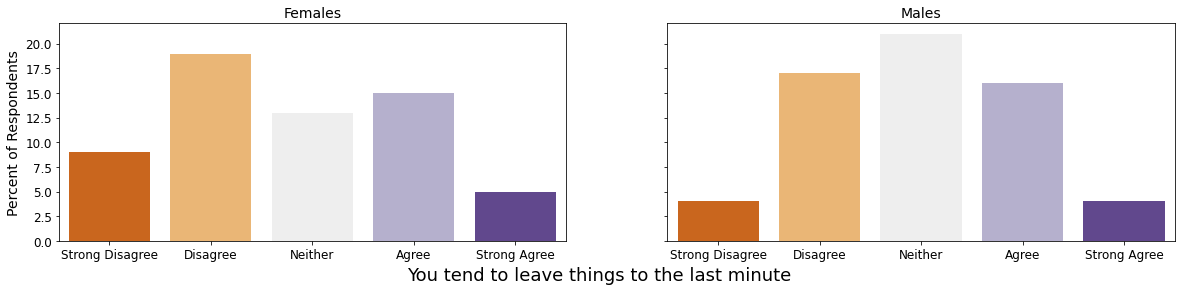

In [46]:
# produce a plot
out = tm.generate_plot(df)

In [47]:
assert tm.read_data

In [48]:
assert tm.calculate_stats

In [49]:
assert tm.generate_plot

In [50]:
# check that plot was generated
### BEGIN HIDDEN TESTS
import matplotlib.pyplot as plt
assert isinstance(out, plt.Figure)
### END HIDDEN TESTS